<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [1]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

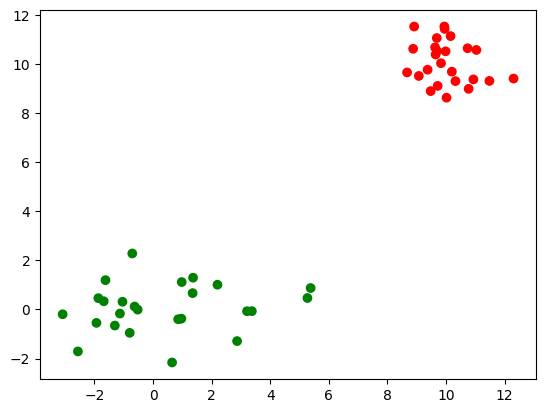

In [2]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets.

### Algorithms:
#### K-means
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan:

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM:

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:


Explain how K-Means works?

K-Means is a clustering algorithm that splits a dataset into a number (K) of distinct groups that do not overlap called clusters. It iteravely assigns datapoints to clusters based on their proximity to the centroids and then recalculates the centroids until convergence so that the distance between the centroid and all of the points is minimized.

Explain how DBScan works?

DBSCAN works by starting with a random datapoint, if it has at least a minimum number of datapoints (predefined) within a specific radius it becomes a core point. Then you expand the cluster by adding all points within a specified radius to the cluster. Check all the points to see if they are a core point and if they are then repeat the process of expanding the new cluster. If a point has fewer neighbors than the threshold, then it becomes an outlier.

Explain how GMM works?

This algorithm works by assuming that the dataset is a mix of a bunch of Gaussian distributions. It iteratively estimates the paramaters of the distributions and computes the liklihood of datapoints belonging to each Gaussian. The maximization step updates the parameters based on the calculated likelihoods.

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [3]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task:
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


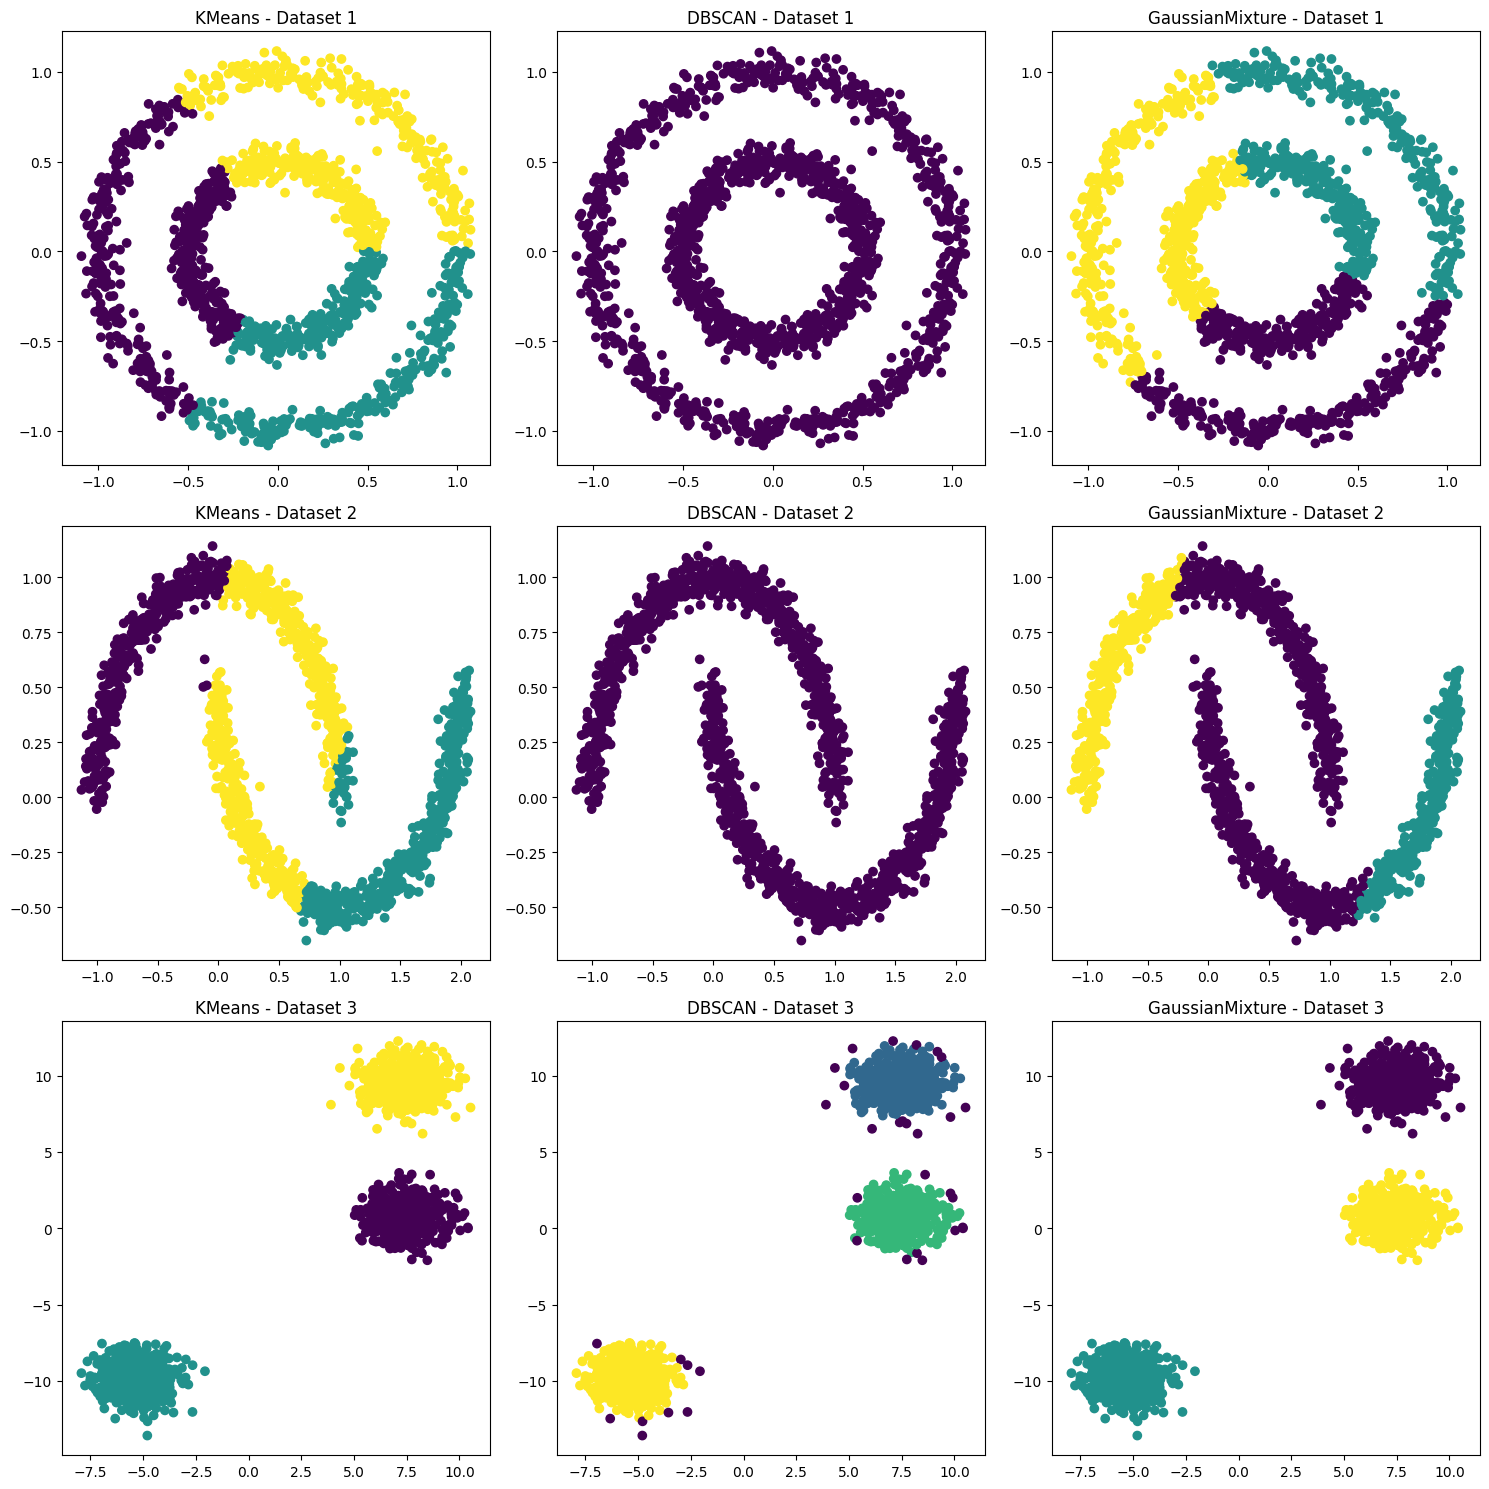

In [4]:
#Enter the code for exercise 1 here
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

datasets = [noisy_circles, noisy_moons, blobs]
algorithms = [KMeans(n_clusters=3), DBSCAN(eps=0.5, min_samples=5), GaussianMixture(n_components=3)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, dataset in enumerate(datasets):
    for j, algorithm in enumerate(algorithms):
        labels = algorithm.fit_predict(dataset)

        axes[i, j].scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
        axes[i, j].set_title(f'{algorithm.__class__.__name__} - Dataset {i+1}')

plt.tight_layout()
plt.show()

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [6]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task:
* Train K-means on the iris dataset with 3 clusters

In [7]:
from sklearn.cluster import KMeans
# your code goes here
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.labels_
# clusters = get predicted clusters indices

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

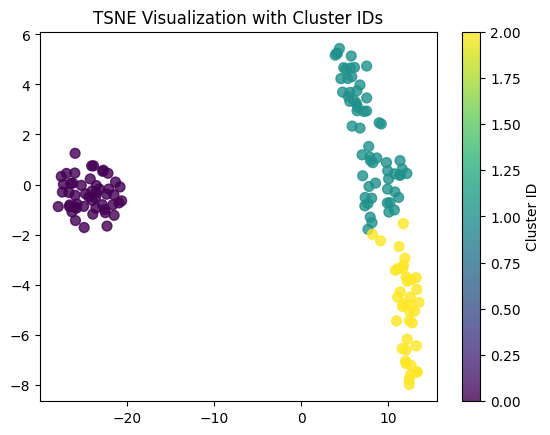

In [13]:
#Enter your code for the X_reduced plot here.
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title('TSNE Visualization with Cluster IDs')
plt.colorbar(label='Cluster ID')
plt.show()


Comment on your observations. Were we successfully able to group samples together without labels?

I think that I was able to groupd the samples together pretty well. The groups are well defined and logical but two of the samples are really close to each other because of the number of centroids. One thing I might change is make it a two centroid K-Means system instead of 3.

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [15]:
# import sklearn.model_selection.train_test_split as train_test_split
# The original import statement didn't work so I fixed it

from sklearn.model_selection import train_test_split

#Split the dataset here
X_train, X_test = train_test_split(X, test_size=0.2)

#Get the number of samples in the train and test sets
print(X_train.shape[0])
print(X_test.shape[0])

120
30


What is the number of samples in the train set?

120 samples (80% of dataset)

What is the number of samples in the test set?

30 samples (20% of dataset)

## Exercise 4: K Nearest Neighbors

Your Task:
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



Train accuracy where n_neighbors = 5: 0.9916666666666667
Test accuracy where n_neighbors = 5: 1.0


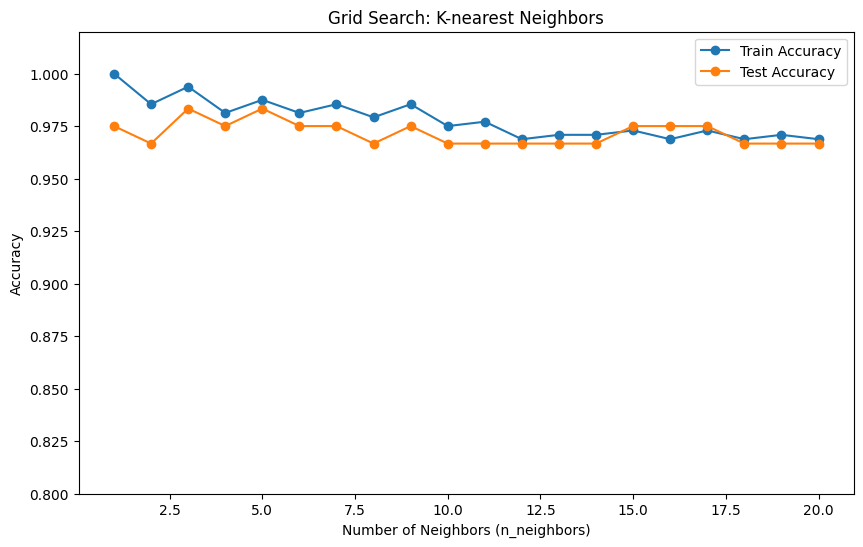

In [38]:
# Enter your code for Exercise 4 here
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

y = kmeans.labels_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_fixed = KNeighborsClassifier(n_neighbors=5)
knn_fixed.fit(X_train, y_train)

train_accuracy_5 = knn_fixed.score(X_train, y_train)
test_accuracy_5 = knn_fixed.score(X_test, y_test)
print("Train accuracy where n_neighbors = 5:", train_accuracy_5)
print("Test accuracy where n_neighbors = 5:", test_accuracy_5)

param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_
n_neighbors_values = np.array(results['param_n_neighbors'])
train_scores = np.array(results['mean_train_score'])
test_scores = np.array(results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_neighbors_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('Grid Search: K-nearest Neighbors')
plt.legend()
plt.ylim(0.8,1.02)
plt.show()

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

Train accuracy for n_neighbors = 5: 0.9916666666666667
Test accuracy for n_neighbors = 5: 1.0

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

One thing that I noticed that seems to happen as the number of neighbors increases is that the train and test accuracys converge due to the train accuracy decreasing as the number of neighbors increases.

I was curious and plotted out n_neighbors 1 to 100 and the accuracy decreases consistently but interestingly stays the same through a little over 40 neighbors to around 62 neighbors and then decreases to about 0.5 accuracy for the rest of the number of neighbors